In [1]:
from IPython.core.display import HTML
from string import Template
def jsConfig():
    src = """
    <script>require.config({ baseUrl: 'https://rawgit.com/kompgraf/course-material/master/assets/' });</script>
    """
    return HTML(src)
def addScript(script, identifier):
    src = Template("""
    <div id="${identifier}-container"></div>
    <script>require(['${script}'], main => main($$("#${identifier}-container"), '${identifier}'));</script>
    """)
    return HTML(src.substitute(script = script, identifier = identifier))
jsConfig()


# Bézier-görbe

## Bevezetés

Az Hermite-ívet követően a Bézier-görbével fogunk foglalkozni. Ez egy rendkívül széles körben használt, nagyon jó tulajdonságokkal rendelkező, könnyen implementálható görbe. Ellentétben az Hermite-ívvel, a Bézier-görbéhez nem szükséges érintővektorokat specifikálni, elegendő csupán kontrollpontokat megadnunk.

A Bézier-görbe a következő feladatra egy lehetséges válasz:

> Keresünk egy olyan görbét, amely az elsőként és utolsóként megadott kontrollpontokon áthalad, a többit pedig sorrendben közelíti.

Vegyük észre, hogy nincsen a kontrollpontok számára vonatkozó korlát. Bézier-görbét tetszőleges számú kontrollpontra illeszthetünk, azonban a kontrollpontok számának növekedésével a számítások instabillá válhatnak, a görbe előnytelen tulajdonságai előtérbe kerülhetnek. Ennek következtében Bézier-görbét leggyakrabban csak négy kontrollpontra szokás illeszteni, harmadfokú görbét eredményezve.

## A de Casteljau-algoritmus

Mielőtt az Hermite-ívhez hasonlóan felírnánk a paraméteres alakot, ismerkedjünk meg a Bézier-görbe előállításának egy másik, intuitívabb módjával, a de Casteljau-algoritmussal.

A de Casteljau-algoritmus egy generatív eljárás, mely szakaszok megfelelő osztópontjának meghatározásán alapul, és segítségével akár papíron is könnyedén rajzolható a pontos eredményt nagyon jól közelítő Bézier-görbe. Legyenek adottak az $A$ és $B$ pontok, és egy $t \in [0, 1]$ paraméterérték. $t$ egy arány lesz, mely azt határozza meg, hogy a szakasz két végpontja milyen súllyal játszik szerepet az osztópont előállításában. Ha $t=0$, akkor az eredmény a szakasz kezdőpontja, ha $t=1$, akkor a szakasz végpontja lesz. A következő képlettel tudjuk meghatározni az $A$ és $B$ pontok közé húzott szakasz $t$ paraméternek megfelelő $P$ osztópontját:

$$
P = (1 - t)A + tB
$$

A fenti képlet ismeretében már minden rendelkezésre áll az algoritmus leírásához. Ha a görbét a $P_0, P_1, \ldots, P_n$ pontokra szeretnénk illeszteni, akkor a görbe $t$ paraméterhez tartozó pontját a következő eljárással kaphatjuk meg:

1. Kiindulva a $P_0, P_1, \ldots, P_n$ kontrollpontokból, képezzünk a szomszédos pontokból szakaszokat. $n+1$ kontrollpont esetén $n$ szakaszt fogunk kapni.
1. Határozzuk meg az összes szakasz $t$-nek megfelelő osztópontját. Ha például $t=\frac{1}{2}$, akkor a kapott pont a szakasz felezőpontja lesz.
1. Az újonnan kapott pontokból képezzünk szakaszokat, ahogy a kontrollpontok esetén, az 1. lépésben is tettük.
1. Folytassuk az eljárást a 2. lépéssel. Ha már nem tudunk több szakaszt létrehozni, azaz csak egy pontunk maradt, készen vagyunk. A legutoljára kapott pont lesz a görbe $t$ paraméterértékhez tartozó pontja.

### Demonstráció

A következő demonstráció a de Casteljau-algoritmus működését mutatja be egy harmadfokú Bézier-görbe esetében. A kontrollpontok mozgathatóak, az éppen kiértékelt paraméterértéket pedig az egér jobbra-balra mozgatásával tudjuk változtatni a $[0, 1]$ intervallumon belül. A téglalap bal széléhez közelítve a paraméter értéke csökken, a jobb széle felé közeledve pedig nő.

In [2]:
addScript("js/bezier-de-casteljau-demo", "bezier-de-casteljau-demo")

## Paraméteres alak

A bevezetésben említésre került, hogy Bézier-görbe esetén nincs a kontrollpontok számára vonatkozó korlát. Tudunk két pontra, de akár hétre is Bézier-görbét illeszteni. Ennek következtében a paraméteres alaknak nem csak $t$, hanem a kontrollpontok indexelésénél használt $n$ is paramétere lesz:

$$
B(n, t) = \sum\limits_{i=0}^{n} b_i(n, t) \cdot P_i \qquad t \in [0, 1]
$$

> Vegyük észre, hogy az előző egyenlet, ha nem veszünk tudomást a kontrollpontok számára bevezetett $n$ paraméterről, akkor az Hermite-ív paraméteres egyenletéhez hasonlóan, nem más, mint a geometriai adatok súlyozott összege!

A fenti egyenletben $b_i(n, t)$ az $i$-edik Bézier-súlyfüggvény, mely egy úgynevezett Bernstein-polinom, és a következőképpen adott:

$$
b_i(n, t) = \binom{n}{i}t^{i}(1 - t)^{(n-i)},
$$

ahol

$$
\binom{n}{i} = 
\begin{cases}
\frac{n!}{i!(n-i)!} & \text{ha } 0 \leq i \leq n \\
0 & \text{egyébként}
\end{cases}
$$

### Demonstráció

A kék téglalapba kattintva kontrollpontokat helyezhetünk el (tetszőleges sokat), melyeket aztán szabadon mozgathatunk. Az elhelyezett pontokra az elhelyezés sorrendjének megfelelően Bézier-görbe lesz illesztve.

In [3]:
addScript("js/bezier-demo", "bezier-demo")

## Tulajdonságok

A Bézier-görbe számos előnyös tulajdonsággal rendelkezik, tekintsünk át ezek közül néhány jelentőset.

* Az előállított görbe az affin transzformációkra vonatkozóan invariáns. Ez azt jelenti, hogy ha affin transzformációt szeretnénk végrehajtani a görbén, azt elegendő csupán a kontrollpontokon elvégeznünk. A transzformált kontrollpontok által meghatározott görbe megegyezik az eredeti görbe transzformáltjával.
* A $[0, 1]$ paramétertartományból képzett görbe a kontrollpontjainak konvex burkán belül halad.
* A görbe szimmetrikus, azaz a $P_0, P_1, \ldots, P_n$ és a $P_n, P_{n-1}, \ldots, P_0$ kontrollpontok ugyanazt a görbét állítják elő.
* A $[0, 1]$ paramétertartományban a görbe kezdő- és végérintői a következők:

$$
  B^{\prime}(n, 0) = (n - 1)(P_1 - P_0) \qquad B^{\prime}(n, 1) = (n - 1)(P_n - P_{n-1})
$$

* A görbe globálisan változtatható, egy kontrollpont elmozdítása az egész görbe alakjára hatással van.
* $n + 1$ kontrollpont esetén az előállított görbe $n$-edfokú lesz.
* Minden, a görbét metsző egyenes pontosan annyiszor metszi a görbét, ahányszor a görbét meghatározó kontrollpontok összekötésével kapott kontrollpoligont. Ez az úgynevezett *variation diminishing* tulajdonság.

## Harmadfokú Bézier-görbe

A jegyzetben leggyakrabban harmadfokú görbékkel, avagy polinomokkal fogunk találkozni, ezért írjuk fel a Bézier-görbe esetén is a harmadfokú paraméteres alakot! Természetesen ezt megtehetnénk egyszerűen a megfelelő Bernstein-polinomok használatával is, azonban induljunk ki inkább a feltételes alakból, ahogy az Hermite-ív esetén is.

### Feltételes és polinomiális alak

Legyenek adottak a $P_0, P_1, P_2, P_3$ kontrollpontok és a következő feltételek:

$$
\begin{align*}
    B(0) &= P_0 \\
    B(1) &= P_3 \\
    B^{\prime}(0) &= 3(P_1 - P_0) \\
    B^{\prime}(1) &= 3(P_3 - P_2)
\end{align*}
$$

> A deriváltra vonatkozó feltételek a görbe kezdő- és végérintőjének előző szakaszban ismertetett felírásából következnek.

A görbét előállító $B(t)$ függvényt

$$
B(t) = \sum\limits_{i=0}^{3}b_i(t)\cdot P_i \qquad t \in [0, 1]
$$

alakban keressük, ahol $b_i$ az $i$-edik súlyfüggvény. A súlyfüggvények mindegyike harmadfokú polinom:

$$
b_i(t) = a_i t^3 + b_i t^2 + c_i t + d_i.
$$

A feladat az együtthatók meghatározása a feltételek alapján. Tekintve, hogy a megoldás ugyanúgy áll elő, mint az Hermite-ív esetén, itt nem kerül levezetésre. A súlyfüggvények az egyenletek megoldása után tehát a következőek lesznek:

$$
\begin{align*}
b_0(t) &= -t^3 + 3t^2 -3t + 1 \\
b_1(t) &= 3t^3 -6t^2 + 3t \\
b_2(t) &= -3t^3 + 3t^2 \\
b_3(t) &= t^3
\end{align*}
$$

Ábrázoljuk a súlyfüggvényeket!

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

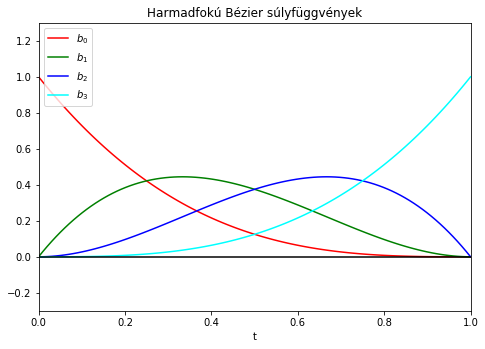

In [4]:
def bezier():
    t = np.linspace(0, 1, 100)

    b0 = (-1*(t**3)) +  (3 * (t**2)) + (-3 * t) + 1
    b1 =  (3*(t**3)) + (-6 * (t**2)) +  (3 * t)
    b2 = (-3*(t**3)) +  (3 * (t**2))
    b3 = t**3

    fig = plt.figure()

    axes = fig.add_axes([0, 0, 1, 1])

    axes.set_xlim([0, 1])
    axes.set_ylim([-0.3, 1.3])

    axes.plot(t, b0, 'r', label='$b_0$')
    axes.plot(t, b1, 'g', label='$b_1$')
    axes.plot(t, b2, 'b', label='$b_2$')
    axes.plot(t, b3, 'cyan', label='$b_3$')
    
    axes.axhline(y=0, color='k')
    
    axes.legend(loc=2);

    axes.set_xlabel('t')
    axes.set_title('Harmadfokú Bézier súlyfüggvények');


bezier()

### Mátrix alak

Az előzőleg felírt súlyfüggvények alapján a harmadfokú Bézier-görbe a következőképpen írható fel mátrix alakban:

$$
B(t) = 
\begin{bmatrix}
P_0 & P_1 & P_2 & P_3
\end{bmatrix}
\cdot
\begin{bmatrix}
-1 & 3 & -3 & 1 \\
3 & -6 & 3 & 0 \\
-3 & 3 & 0 & 0 \\
1 & 0 & 0 & 0
\end{bmatrix}
\cdot
\begin{bmatrix}
t^3 \\
t^2 \\
t \\ 
1
\end{bmatrix}.
$$


## Kapcsolat a Bézier-görbe és az Hermite-ív között

Az előző jegyzetben az Hermite-ívet, a jelenlegiben pedig a Bézier-görbét ismertük meg. Nézzük meg, hogy milyen kapcsolatban áll a kettő egymással, lehetséges-e egymással ekvivalens Bézier-görbét és Hermite-ívet felírni?

### Bézier-görbéből Hermite-ív

Ha egy harmadfokú Bézier-görbe négy kontrollpontja $P_0, P_1, P_2, P_3$, akkor a vele ekvivalens Hermite-ív geometriai adatai a következőek:

$$
\begin{align*}
P &= P_0 \\
Q &= P_3 \\
v &= 3(P_1 - P_0) \\
w &= 3(P_3 - P_2)
\end{align*}
$$

ahol $P$ és $Q$ a két kontrollpont, $v$ és $w$ pedig az e pontokba húzott érintővektor.

### Hermite-ívből Bézier-görbe

Legyenek az Hermite-ívet definiáló geometriai adatok $P, Q, v, w$! Keressük azokat a $P_0, P_1, P_2, P_3$ kontrollpontokat, melyek az előző adatok által képzett Hermite-ívvel ekvivalens Bézier-görbét állítanak elő.

Az Hermite-ív áthalad a $P$ és $Q$ pontokon, és így kell tennie a Bézier-görbének is. Tehát

$$
\begin{align*}
P_0 &= P \\
P_3 &= Q
\end{align*}
$$

Az Hermite-ív esetén ismerjük ezen pontokban az érintővektorokat, míg a Bézier-görbe esetén tudjuk, hogyan kell kiszámítani őket a kontrollpontokból. Írjuk fel tehát a következő egyenleteket:

$$
\begin{align*}
v &= 3(P_1-P_0) \\
w &= 3(P_3-P_2)
\end{align*}
$$

Eddig ugyanott tartunk, mint a fordított irányban. Azonban most az érintővektorok ismertek, és a köztes $P_1$, $P_2$ kontrollpontokat keressük. Az egyenletek átrendezése után ezek a következő formában adódnak:

$$
\begin{align*}
P_1 &= P_0 + \frac{v}{3} \\
P_2 &= P_3 - \frac{w}{3}
\end{align*}
$$

Ezzel készen vagyunk, ismerjük mind a négy kontrollpontot.

## Források

* Dr. Kovács Emőd (2011). *Komputergrafika: Matematikai alapok*. pp. 83-90. http://aries.ektf.hu/~hz/pdf-tamop/pdf-01/download/grafika.pdf
* J. F. Hughes, A. van Dam (2013). Computer Graphics: Principles and Practice, Third Edition, Chapter 22W, pp. 82-86. http://dept.cs.williams.edu/~morgan/cgpp/file/cgpp3e_ch22W.pdf
* P. Shirley, S. Marschner (2009). *Fundamentals of Computer Graphics*. Third Edition, pp. 365-375.
* Mike Kamermans. *A Primer on Bézier Curves*. https://pomax.github.io/bezierinfo/

Utóbbi forrás rendkívül ajánlott azoknak, akik többre kíváncsiak a Bézier-görbékkel kapcsolatban.

In [4]:
def styling():
    styles = open("../../styles/custom.html", "r").read()
    return HTML(styles)
styling()
